In [1]:
  #import library to be used
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:

data

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,?,?,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,0,0


# New Section

In [3]:
#try to check the null but cannot be identified becuase null value reperesented in '?'
data.isnull().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


In [4]:
# Turn "?" symbol into NaN to make it readable for python
missing_value = ["?", np.nan]
data = pd.read_csv("risk_factors_cervical_cancer.csv", na_values=missing_value)

data.isnull().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [5]:
#drop the unecessary columns
col = ['Smokes', 'IUD', 'STDs', 'STDs: Number of diagnosis', 'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis', 'Dx','STDs (number)']
data = data.drop(columns=col)
#check the columns dropped or not
data.isnull().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD (years)                           117
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                      105
STDs:HPV                              105
Dx:Cancer                               0
Dx:CIN                                  0
Dx:HPV                            

In [6]:
#check if the data has duplicated row
data.duplicated().sum()

23

In [7]:
#drop the duplicated row
data.drop_duplicates(inplace=True)
data

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD (years),STDs:condylomatosis,...,STDs:HIV,STDs:Hepatitis B,STDs:HPV,Dx:Cancer,Dx:CIN,Dx:HPV,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,37.0,37.0,1.0,3.00,0.0,0.0,...,0.0,0.0,0.0,1,0,1,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,1.0,15.00,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,1.0,8.00,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,1.0,0.08,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,1.0,0.08,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0


In [8]:
#merged four target variables into one
column_names = ['Hinselmann', 'Schiller', 'Citology', 'Biopsy']
data['Diagnosed']= data[column_names].sum(axis=1)
#drop the merged columns
col = ['Hinselmann', 'Schiller', 'Citology', 'Biopsy']
data = data.drop(columns=col)
data

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD (years),STDs:condylomatosis,...,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,Dx:Cancer,Dx:CIN,Dx:HPV,Diagnosed
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
3,52,5.0,16.0,4.0,37.0,37.0,1.0,3.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0
4,46,3.0,21.0,4.0,0.0,0.0,1.0,15.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,1.0,8.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,1.0,0.08,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1
856,33,2.0,24.0,2.0,0.0,0.0,1.0,0.08,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0


In [9]:
#fill the null value with data's mean and median
datamean = data.fillna(data.mean())
datamedian = data.fillna(data.median())
datamean

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD (years),STDs:condylomatosis,...,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,Dx:Cancer,Dx:CIN,Dx:HPV,Diagnosed
0,18,4.0,15.000000,1.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
1,15,1.0,14.000000,1.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
2,34,1.0,17.020531,1.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
3,52,5.0,16.000000,4.0,37.0,37.0,1.0,3.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0
4,46,3.0,21.000000,4.0,0.0,0.0,1.0,15.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.000000,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
854,32,2.0,19.000000,1.0,0.0,0.0,1.0,8.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
855,25,2.0,17.000000,0.0,0.0,0.0,1.0,0.08,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1
856,33,2.0,24.000000,2.0,0.0,0.0,1.0,0.08,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0


In [10]:
datamedian

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD (years),STDs:condylomatosis,...,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,Dx:Cancer,Dx:CIN,Dx:HPV,Diagnosed
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
2,34,1.0,17.0,1.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
3,52,5.0,16.0,4.0,37.0,37.0,1.0,3.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0
4,46,3.0,21.0,4.0,0.0,0.0,1.0,15.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,1.0,8.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,1.0,0.08,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1
856,33,2.0,24.0,2.0,0.0,0.0,1.0,0.08,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0


In [11]:
#round the float value into 2 decimal values
datamean = datamean.round(decimals = 2)
datamedian = datamedian.round(decimals = 2)
datamean

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD (years),STDs:condylomatosis,...,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,Dx:Cancer,Dx:CIN,Dx:HPV,Diagnosed
0,18,4.0,15.00,1.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
1,15,1.0,14.00,1.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
2,34,1.0,17.02,1.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
3,52,5.0,16.00,4.0,37.0,37.0,1.0,3.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0
4,46,3.0,21.00,4.0,0.0,0.0,1.0,15.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
854,32,2.0,19.00,1.0,0.0,0.0,1.0,8.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
855,25,2.0,17.00,0.0,0.0,0.0,1.0,0.08,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1
856,33,2.0,24.00,2.0,0.0,0.0,1.0,0.08,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0


In [12]:
#using mean to fill the null value,checking the null value existent
datamean.isnull().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD (years)                           0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0
Dx:Cancer                             0
Dx:CIN                                0
Dx:HPV                                0
Diagnosed                             0


In [13]:
#DATA ANALYSIS
y_variable=['Diagnosed'] #Create columns for y variables
#Create columns for non-boolean x variables
X_col_new = ['Age','Number of sexual partners','First sexual intercourse','Num of pregnancies','Hormonal Contraceptives (years)','IUD (years)'] 
x_var = datamean[X_col_new] #Create new dataset for non-boolean x variables
x_var

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Hormonal Contraceptives (years),IUD (years)
0,18,4.0,15.00,1.0,0.00,0.0
1,15,1.0,14.00,1.0,0.00,0.0
2,34,1.0,17.02,1.0,0.00,0.0
3,52,5.0,16.00,4.0,3.00,0.0
4,46,3.0,21.00,4.0,15.00,0.0
...,...,...,...,...,...,...
853,34,3.0,18.00,0.0,0.00,0.0
854,32,2.0,19.00,1.0,8.00,0.0
855,25,2.0,17.00,0.0,0.08,0.0
856,33,2.0,24.00,2.0,0.08,0.0


In [14]:
#Method to look for outliers using z-score

def detect_outliers_zscore(x_data, threshold):
    """
    Detect outliers in the given x-variables using z-scores.   
    Args:
        x_data (array-like): The input x-variables data.
        threshold (float): The z-score threshold for determining outliers.
        Data points with z-scores greater than the threshold are considered outliers.
    Returns:
        array: Boolean array indicating whether each x-data point is an outlier (True) or not (False).
    """
    x_mean = np.mean(x_data, axis=0)
    x_std = np.std(x_data, axis=0)
    z_scores = np.abs((x_data - x_mean) / x_std)
    outliers = z_scores > threshold
    return outliers

In [15]:
outliers = detect_outliers_zscore(x_var, threshold=3) #Look for outliers in x_var (threshold value can be modified)
outliers

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Hormonal Contraceptives (years),IUD (years)
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,True,False
...,...,...,...,...,...,...
853,False,False,False,False,False,False
854,False,False,False,False,False,False
855,False,False,False,False,False,False
856,False,False,False,False,False,False


In [16]:
clean_data = datamean[~outliers.any(axis=1)] #Remove rows containing outliers in datamean
clean_data

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD (years),STDs:condylomatosis,...,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,Dx:Cancer,Dx:CIN,Dx:HPV,Diagnosed
0,18,4.0,15.00,1.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
1,15,1.0,14.00,1.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
2,34,1.0,17.02,1.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
3,52,5.0,16.00,4.0,37.0,37.0,1.0,3.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0
5,42,3.0,23.00,2.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
854,32,2.0,19.00,1.0,0.0,0.0,1.0,8.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
855,25,2.0,17.00,0.0,0.0,0.0,1.0,0.08,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1
856,33,2.0,24.00,2.0,0.0,0.0,1.0,0.08,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0


Linear Regression model by Azim

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x = clean_data.drop(columns = 'Diagnosed')
y = clean_data['Diagnosed']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

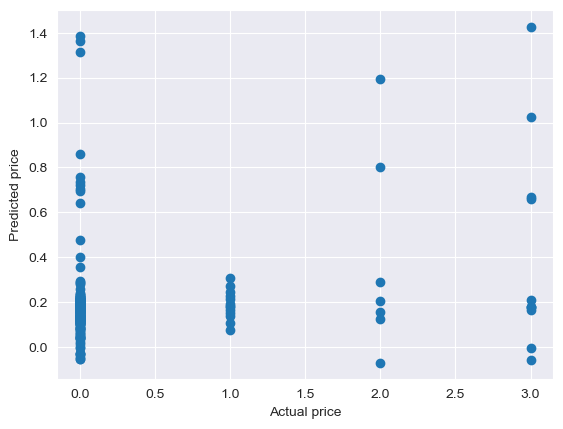

In [18]:
import matplotlib.pyplot as plt

y_pred_test = lr.predict(x_test)

plt.scatter(y_test, y_pred_test)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.show()

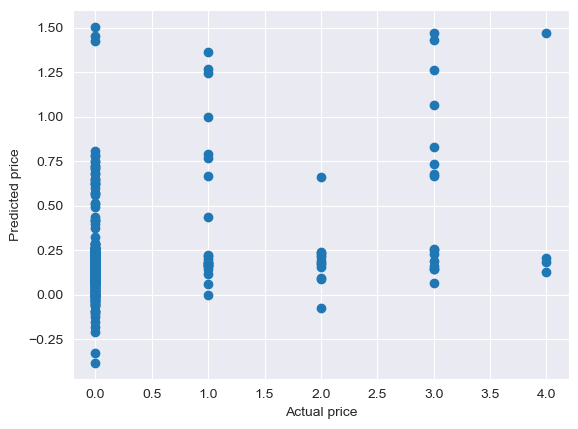

In [19]:
y_pred_train = lr.predict(x_train)

plt.scatter(y_train, y_pred_train)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.show()

In [20]:
from sklearn.metrics import r2_score

r2score = r2_score(y_test, y_pred_test)
r2score

0.04828612198506854

In [21]:
r2score = r2_score(y_train, y_pred_train)
r2score

0.10974348517367083

In [22]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred_test)

0.5224774285288332

In [23]:
mean_squared_error(y_train, y_pred_train)

0.4323295583111262

Neural Network by DanielHensemPadu

In [24]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

In [25]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 751 entries, 0 to 857
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 751 non-null    int64  
 1   Number of sexual partners           751 non-null    float64
 2   First sexual intercourse            751 non-null    float64
 3   Num of pregnancies                  751 non-null    float64
 4   Smokes (years)                      751 non-null    float64
 5   Smokes (packs/year)                 751 non-null    float64
 6   Hormonal Contraceptives             751 non-null    float64
 7   Hormonal Contraceptives (years)     751 non-null    float64
 8   IUD (years)                         751 non-null    float64
 9   STDs:condylomatosis                 751 non-null    float64
 10  STDs:cervical condylomatosis        751 non-null    float64
 11  STDs:vaginal condylomatosis         751 non-n

In [26]:
# Prepare the data
features = ['Age', 'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies', 'Smokes (years)',
            'Smokes (packs/year)', 'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD (years)', 'STDs:condylomatosis','STDs:cervical condylomatosis','STDs:vaginal condylomatosis','STDs:vulvo-perineal condylomatosis','STDs:syphilis','STDs:pelvic inflammatory disease','STDs:genital herpes','STDs:molluscum contagiosum','STDs:AIDS','STDs:HIV','STDs:Hepatitis B','STDs:HPV','Dx:Cancer','Dx:CIN','Dx:HPV',]
features

['Age',
 'Number of sexual partners',
 'First sexual intercourse',
 'Num of pregnancies',
 'Smokes (years)',
 'Smokes (packs/year)',
 'Hormonal Contraceptives',
 'Hormonal Contraceptives (years)',
 'IUD (years)',
 'STDs:condylomatosis',
 'STDs:cervical condylomatosis',
 'STDs:vaginal condylomatosis',
 'STDs:vulvo-perineal condylomatosis',
 'STDs:syphilis',
 'STDs:pelvic inflammatory disease',
 'STDs:genital herpes',
 'STDs:molluscum contagiosum',
 'STDs:AIDS',
 'STDs:HIV',
 'STDs:Hepatitis B',
 'STDs:HPV',
 'Dx:Cancer',
 'Dx:CIN',
 'Dx:HPV']

In [27]:
target = 'Diagnosed'
target

'Diagnosed'

In [28]:
labels = clean_data['Diagnosed'].values
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 1, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 3, 0, 4, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 3, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,
       0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,

In [29]:
# Normalize the features
features = (features - features.mean(axis=0)) / features.std(axis=0)

AttributeError: 'list' object has no attribute 'mean'

In [ ]:
clean_data

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD (years),STDs:condylomatosis,...,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,Dx:Cancer,Dx:CIN,Dx:HPV,Diagnosed
0,18,4.0,15.00,1.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
1,15,1.0,14.00,1.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
2,34,1.0,17.02,1.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
3,52,5.0,16.00,4.0,37.0,37.0,1.0,3.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0
5,42,3.0,23.00,2.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
854,32,2.0,19.00,1.0,0.0,0.0,1.0,8.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
855,25,2.0,17.00,0.0,0.0,0.0,1.0,0.08,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1
856,33,2.0,24.00,2.0,0.0,0.0,1.0,0.08,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0


In [ ]:
print(labels.shape)

(751,)


In [ ]:
print(labels.shape)

(751,)


In [ ]:
print(features.shape)

(751, 24)


In [ ]:
# Split the dataset into training and testing sets (80% for training, 20% for testing)
split = int(0.8 * len(features))
train_features = features[:split]
train_labels = labels[:split]
test_features = features[split:]
test_labels = labels[split:]

In [ ]:
# Define the neural network architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(len(features[0]),)))
model.add(Dense(64, activation='relu'))
#model.add(Dense(1))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
# Train the model
model.fit(train_features, train_labels, epochs=10, batch_size=32)


In [ ]:
# Evaluate the model on the testing set
loss, accuracy = model.evaluate(test_features, test_labels)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

In [ ]:
from sklearn.metrics import r2_score

# Assuming you have already trained your model and have test_features and test_labels
predictions = model.predict(test_features)
r2 = r2_score(test_labels, predictions)
print('R-squared:', r2)

In [ ]:
from sklearn.metrics import mean_squared_error

# Assuming you have already trained your model and have test_features and test_labels
predictions = model.predict(test_features)
mse = mean_squared_error(test_labels, predictions)
rmse = np.sqrt(mse)
print('RMSE:', rmse)